# ESTUDIO DE UN MODELO DE PREDICCIÓN DE CASOS DE DENGUE

Los dataset usados son:

Casos de dengue: **data_abiertos_vigilancia_dengue_2000_2023.csv**:
*Este dataset contiene información sobre la notificación de casos de dengue al sistema de vigilancia en salud pública del Perú, gestionado y administrado por el Centro Nacional de Epidemiología, Prevención y Control de Enfermedades (CDC PERU). Los datos provienen de la Red Nacional de Epidemiología (RENACE), que está conformada por 10 232 establecimientos de salud del Ministerio de Salud, EsSalud y otros del sector en los diferentes niveles de las Direcciones Regionales de Salud que tiene el Perú. De estos, 8 483 son Unidades Notificantes, reconocidos con Resolución Directoral de las respectivas Diresas/Geresas de Salud del Perú.*

| CAMPO       | TIPO     | DENOMINACIÓN                      | VALORES                                      |
|-------------|----------|-----------------------------------|----------------------------------------------|
| departamento  | Caracter | Región geográfica                 |                                              |
| provincia   | Caracter | Provincia                         |                                              |
| distrito    | Caracter | Lugar probable de infección       |                                              |
| enfermedad  | Caracter | Diagnóstico vigilado              |                                              |
| ano         | Integer  | Año                               |                                              |
| semana      | Integer  | Semana de inicio de síntomas      |                                              |
| diagnostic  | Caracter | CIE 10                            |                                              |
| tipo_dx     | Caracter | Tipo de diagnóstico               | C= Confirmado, P = Probable, S = Sospechoso   |
| diresa      | Caracter | Dirección de salud que notifica   |                                              |
| ubigeo      | Caracter | Código del lugar probable de infección |                                              |
| edad        | Caracter | Edad del paciente                 |                                              |
| tipo_edad   | Caracter | Tipo de edad del paciente         | A = Año, M = Mes, D = Días                   |
| sexo        | Caracter | Sexo                              | M = Masculino, F = Femenino                  |

Indicadores metereológicos: **datos_metereo_piura.xlsx**:

*Este dataset contiene información meterológicas del distrito de Piura desde el año 2016 al 2024*

| CAMPO        | DESCRIPCIÓN                                  | TIPO DE DATO | EJEMPLOS |
|--------------|----------------------------------------------|--------------|----------|
| departamento   | Nombre del departamento.                     | Texto        | PIURA    |
| provincia    | Nombre de la provincia dentro del departamento. | Texto        | PIURA    |
| distrito     | Nombre del distrito dentro de la provincia.   | Texto        | PIURA    |
| ubigeo       | Código geográfico único del distrito.       | Numérico     | 200101   |
| tmean        | Temperatura media registrada.                | Numérico     | 27.2     |
| tmax         | Temperatura máxima registrada.               | Numérico     | 34.2     |
| tmin         | Temperatura mínima registrada.               | Numérico     | 22.9     |
| humr         | Humedad relativa registrada (en porcentaje). | Numérico     | 68       |
| ptot         | Precipitación total registrada.              | Numérico     | 0        |
| ano          | Año del registro.                            | Numérico     | 2016     |
| semana       | Semana del año del registro.                 | Numérico     | 1        |

Población: **PoblacionPiuraDistrito.xlsx**:

*Este dataset contiene información de la cantidad de habitantes del distrito de Piura desde el año 2016 al 2023*

| CAMPO        | DESCRIPCIÓN                                  | TIPO DE DATO | EJEMPLOS |
|--------------|----------------------------------------------|--------------|----------|
| Año   | Año.                     | Numérico        | 2017    |
| Poblacion    | Cantidad de habitantes. | Numérico        | 19282    |


# 1. ENTENDIMIENTO DEL DATASET

In [1]:
import pandas as pd

In [2]:
# Para data_Dengue
data_Dengue = pd.read_csv('data_abiertos_vigilancia_dengue_2000_2023.csv')
#print(data.head())
data_Dengue.head()

,departamento,provincia,distrito,enfermedad,ano,semana,diagnostic,tipo_dx,diresa,ubigeo,edad,tipo_edad,sexo
0,HUANUCO,LEONCIO PRADO,LUYANDO,DENGUE SIN SIGNOS DE ALARMA,2000,47,A97.0,P,10.0,100605,9,A,M
1,HUANUCO,LEONCIO PRADO,LUYANDO,DENGUE SIN SIGNOS DE ALARMA,2000,40,A97.0,P,10.0,100605,18,A,F
2,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,DENGUE SIN SIGNOS DE ALARMA,2000,48,A97.0,C,10.0,100604,32,A,F
3,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,DENGUE SIN SIGNOS DE ALARMA,2000,37,A97.0,P,10.0,100604,40,A,F
4,HUANUCO,LEONCIO PRADO,MARIANO DAMASO BERAUN,DENGUE SIN SIGNOS DE ALARMA,2000,42,A97.0,C,10.0,100606,16,A,M


In [3]:
# Ver los tipos de datos de las columnas
print(data_Dengue.dtypes)

departamento     object
provincia        object
distrito         object
enfermedad       object
ano               int64
semana            int64
diagnostic       object
tipo_dx          object
diresa          float64
ubigeo            int64
edad              int64
tipo_edad        object
sexo             object
dtype: object


In [4]:
# Data Dengue
# Numero de Filas
print("Número de filas: ", len(data_Dengue))

# Número de columnas
print("Número de columnas:", data_Dengue.shape[1])

Número de filas:  757890
Número de columnas: 13


In [5]:
# Para data_Meterologica
data_Meterologica = pd.read_excel('datos_metereo_piura.xlsx')
#print(data.head())
data_Meterologica.head()

,departamento,provincia,distrito,ubigeo,tmean,tmax,tmin,humr,ptot,ano,semana
0,PIURA,PIURA,PIURA,200101,27.2,34.2,22.9,68.0,0.0,2016,1
1,PIURA,PIURA,PIURA,200101,27.2,34.0,23.0,68.0,0.0,2016,2
2,PIURA,PIURA,PIURA,200101,27.7,34.6,NaN,66.7,5.1,2016,3
3,PIURA,PIURA,PIURA,200101,27.5,33.9,23.7,69.3,10.9,2016,4
4,PIURA,PIURA,PIURA,200101,27.2,32.5,23.9,73.8,6.2,2016,5


In [6]:
# Ver los tipos de datos de las columnas
print(data_Meterologica.dtypes)

departamento     object
provincia        object
distrito         object
ubigeo            int64
tmean           float64
tmax            float64
tmin            float64
humr            float64
ptot            float64
ano               int64
semana            int64
dtype: object


In [7]:
# Data Meterologica
# Numero de Filas
print("Número de filas: ", len(data_Meterologica))

# Número de columnas
print("Número de columnas:", data_Meterologica.shape[1])

Número de filas:  530
Número de columnas: 11


In [8]:
#Fltro de la Base Dengue para Piura, para casos confirmados (Solo se filtra para Piura, ya que los datos meteorologicos que tenemos solo son de Piura)
filtro = (data_Dengue['departamento'] == 'PIURA') & (data_Dengue['provincia'] == 'PIURA') & (data_Dengue['distrito'] == 'PIURA') & (data_Dengue['tipo_dx'] == 'C')
data_Dengue_Piura = data_Dengue[filtro]
data_Dengue_Piura

,departamento,provincia,distrito,enfermedad,ano,semana,diagnostic,tipo_dx,diresa,ubigeo,edad,tipo_edad,sexo
5159,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2000,41,A97.0,C,32.0,200101,47,A,M
5167,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2000,40,A97.0,C,32.0,200101,22,A,F
5182,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2000,45,A97.0,C,32.0,200101,16,A,F
15032,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2001,2,A97.0,C,32.0,200101,41,A,M
25536,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2001,16,A97.0,C,32.0,200101,60,A,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
756839,PIURA,PIURA,PIURA,DENGUE CON SIGNOS DE ALARMA,2023,25,A97.1,C,32.0,200101,12,A,F
756841,PIURA,PIURA,PIURA,DENGUE CON SIGNOS DE ALARMA,2023,38,A97.1,C,32.0,200101,24,A,M
756842,PIURA,PIURA,PIURA,DENGUE CON SIGNOS DE ALARMA,2023,42,A97.1,C,32.0,200101,29,A,F
757727,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2023,52,A97.0,C,32.0,200101,58,A,M


In [9]:
# Agrupación de Dataset por años, para poder filtrar solo los años en comun de ambos DataSet

In [10]:
#Agrupación data_Meterologica
#Columna Año
data_Meterologica_Año = data_Meterologica.groupby('ano').size()
print('\n',data_Meterologica_Año)


 ano
2016    53
2017    53
2018    53
2019    53
2020    53
2021    53
2022    53
2023    53
2024    53
2025    53
dtype: int64


In [11]:
# Agrupaciones data_Dengue_Piura
# Columna Año
data_Dengue_Piura_Año = data_Dengue_Piura.groupby('ano').size()
print('\n',data_Dengue_Piura_Año)


 ano
2000        3
2001       27
2004        6
2005        1
2006        1
2007        1
2008       41
2009      395
2010     3513
2011       49
2012      103
2013      106
2014     1684
2015     1659
2016      623
2017    12808
2018       39
2019        7
2020       14
2021      157
2022      833
2023    12161
dtype: int64


In [12]:
# Fltro de la Base Metereologica para Piura, para los años 2016 - 2023
filtro = (data_Meterologica['ano'] != 2024) & (data_Meterologica['ano'] != 2025) 
data_Meterologica_2016_2023 = data_Meterologica[filtro]
data_Meterologica_2016_2023

,departamento,provincia,distrito,ubigeo,tmean,tmax,tmin,humr,ptot,ano,semana
0,PIURA,PIURA,PIURA,200101,27.2,34.2,22.9,68.0,0.0,2016,1
1,PIURA,PIURA,PIURA,200101,27.2,34.0,23.0,68.0,0.0,2016,2
2,PIURA,PIURA,PIURA,200101,27.7,34.6,NaN,66.7,5.1,2016,3
3,PIURA,PIURA,PIURA,200101,27.5,33.9,23.7,69.3,10.9,2016,4
4,PIURA,PIURA,PIURA,200101,27.2,32.5,23.9,73.8,6.2,2016,5
...,...,...,...,...,...,...,...,...,...,...,...
419,PIURA,PIURA,PIURA,200101,25.3,32.1,20.7,67.6,0.0,2023,49
420,PIURA,PIURA,PIURA,200101,25.8,33.1,21.1,68.0,0.7,2023,50
421,PIURA,PIURA,PIURA,200101,26.2,33.5,21.7,68.3,0.0,2023,51
422,PIURA,PIURA,PIURA,200101,25.0,30.7,21.7,77.1,29.0,2023,52


In [13]:
#Fltro de la Base Dengue para Piura, para los años 2016 - 2023
filtro = (data_Dengue_Piura['ano'] >= 2016) & (data_Dengue_Piura['ano'] <= 2023) 
data_Dengue_Piura_2016_2023 = data_Dengue_Piura[filtro]
data_Dengue_Piura_2016_2023

,departamento,provincia,distrito,enfermedad,ano,semana,diagnostic,tipo_dx,diresa,ubigeo,edad,tipo_edad,sexo
232103,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2016,15,A97.0,C,32.0,200101,21,A,F
232112,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2016,15,A97.0,C,32.0,200101,53,A,M
232134,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2016,16,A97.0,C,32.0,200101,7,A,M
232226,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2016,16,A97.0,C,32.0,200101,48,A,F
232239,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2016,16,A97.0,C,32.0,200101,49,A,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
756839,PIURA,PIURA,PIURA,DENGUE CON SIGNOS DE ALARMA,2023,25,A97.1,C,32.0,200101,12,A,F
756841,PIURA,PIURA,PIURA,DENGUE CON SIGNOS DE ALARMA,2023,38,A97.1,C,32.0,200101,24,A,M
756842,PIURA,PIURA,PIURA,DENGUE CON SIGNOS DE ALARMA,2023,42,A97.1,C,32.0,200101,29,A,F
757727,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2023,52,A97.0,C,32.0,200101,58,A,M


# 2. LIMPIEZA DE DATOS

In [14]:
# Tratamiento de Missing para data_Meterologica_2016_2023
# Metodo visual para ver que columnas contienen algún missing
data_Meterologica_2016_2023.isnull().any()

departamento    False
provincia       False
distrito        False
ubigeo          False
tmean            True
tmax            False
tmin             True
humr            False
ptot            False
ano             False
semana          False
dtype: bool

In [15]:
# Número de missing por columnas
data_Meterologica_2016_2023.isnull().sum()

departamento    0
provincia       0
distrito        0
ubigeo          0
tmean           1
tmax            0
tmin            4
humr            0
ptot            0
ano             0
semana          0
dtype: int64

<Axes: >

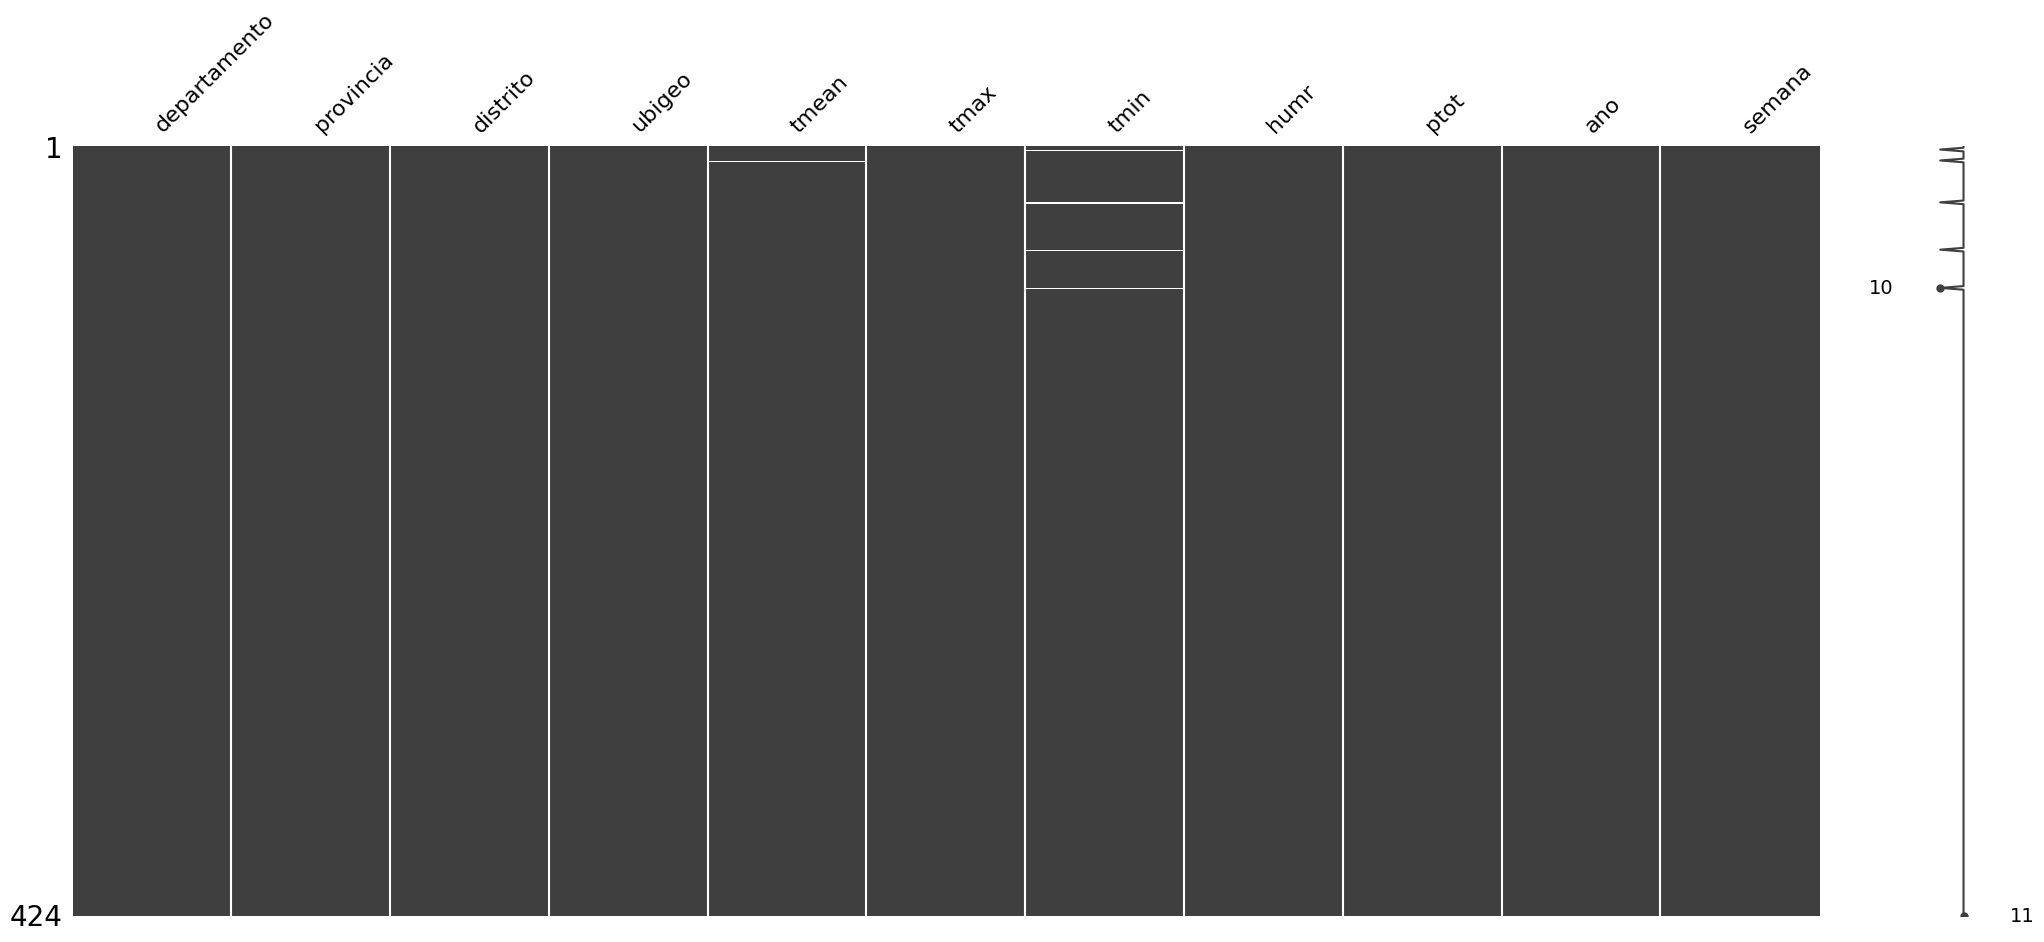

In [16]:
# Analisis Missing

# Importa la biblioteca missingno, que se usa para visualizar datos faltantes en un DataFrame de pandas.
# Se le asigna el alias 'msno' para facilitar su uso.
import missingno as msno

# Genera una matriz de visualización que muestra la distribución de los valores nulos en el DataFrame 'data_Meterologica_2016_2023'.
msno.matrix(data_Meterologica_2016_2023) 

<Axes: >

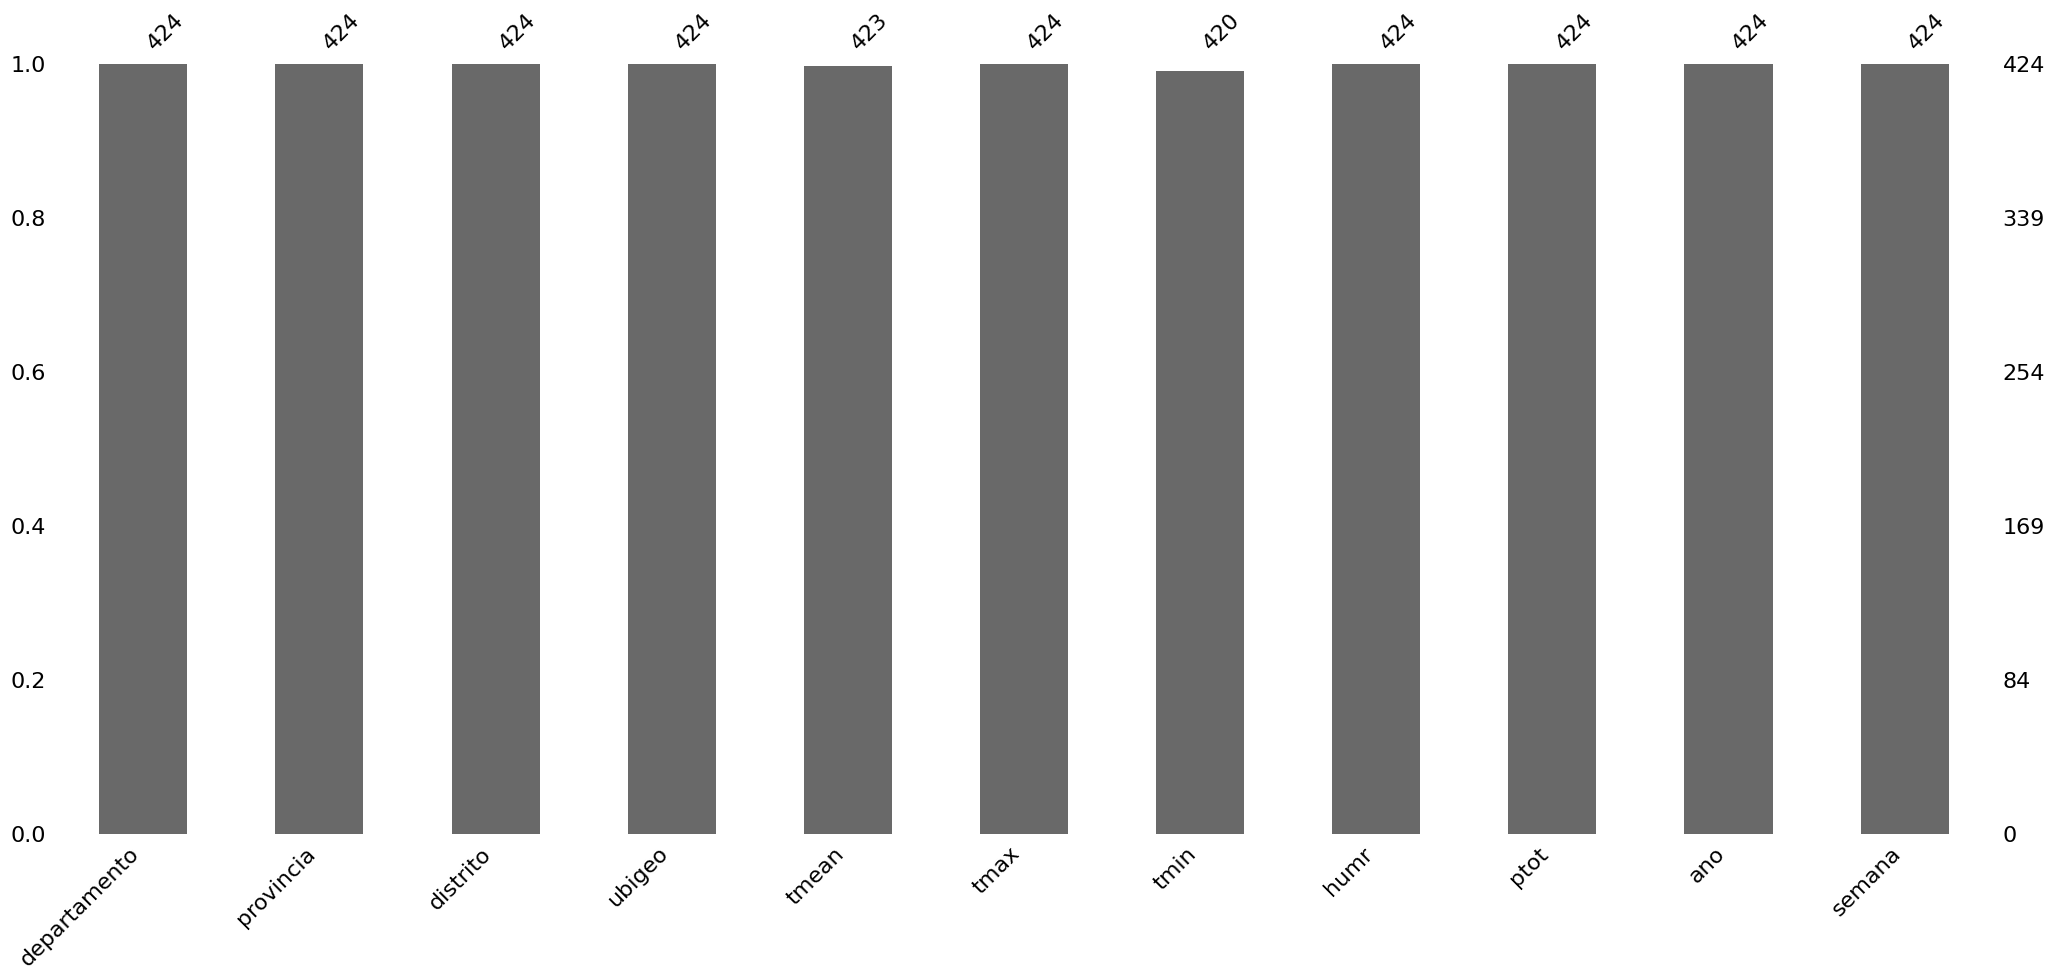

In [17]:
# Genera un gráfico de barras para visualizar los datos faltantes en el DataFrame 'data_Meterologica_2016_2023'.
msno.bar(data_Meterologica_2016_2023)

In [18]:
# Imputar los valores NaN con la media de la columna 'tmean'
data_Meterologica_2016_2023.loc[:, 'tmean'] = data_Meterologica_2016_2023['tmean'].fillna(data_Meterologica_2016_2023['tmean'].mean())

In [19]:
# Imputar los valores NaN con el modelo RandomForest, para la columna 'tmin'
from sklearn.ensemble import RandomForestRegressor

# 1. Eliminar filas con valores faltantes en las variables usadas para entrenamiento
datos_completos = data_Meterologica_2016_2023[['tmean', 'tmax', 'tmin']].dropna()

# 2. Definir características (X) y variable objetivo (y) con datos completos
X_completo = datos_completos[['tmean', 'tmax']]
y_completo = datos_completos['tmin']

# 3. Crear y entrenar el modelo
modelo_rf = RandomForestRegressor()
modelo_rf.fit(X_completo, y_completo)

# 4. Filtrar las filas con 'tmin' faltante pero con 'tmean' y 'tmax' disponibles
X_faltante = data_Meterologica_2016_2023[
    data_Meterologica_2016_2023['tmin'].isna() & 
    data_Meterologica_2016_2023['tmean'].notna() & 
    data_Meterologica_2016_2023['tmax'].notna()
][['tmean', 'tmax']]

# 5. Predecir los valores faltantes de 'tmin'
predicciones = modelo_rf.predict(X_faltante)

# 6. Imputar los valores predichos en el DataFrame original
data_Meterologica_2016_2023.loc[X_faltante.index, 'tmin'] = predicciones


In [20]:
# Número de missing por columnas, para data_Meterologica_2016_2023
data_Meterologica_2016_2023.isnull().sum()

departamento    0
provincia       0
distrito        0
ubigeo          0
tmean           0
tmax            0
tmin            0
humr            0
ptot            0
ano             0
semana          0
dtype: int64

<Axes: >

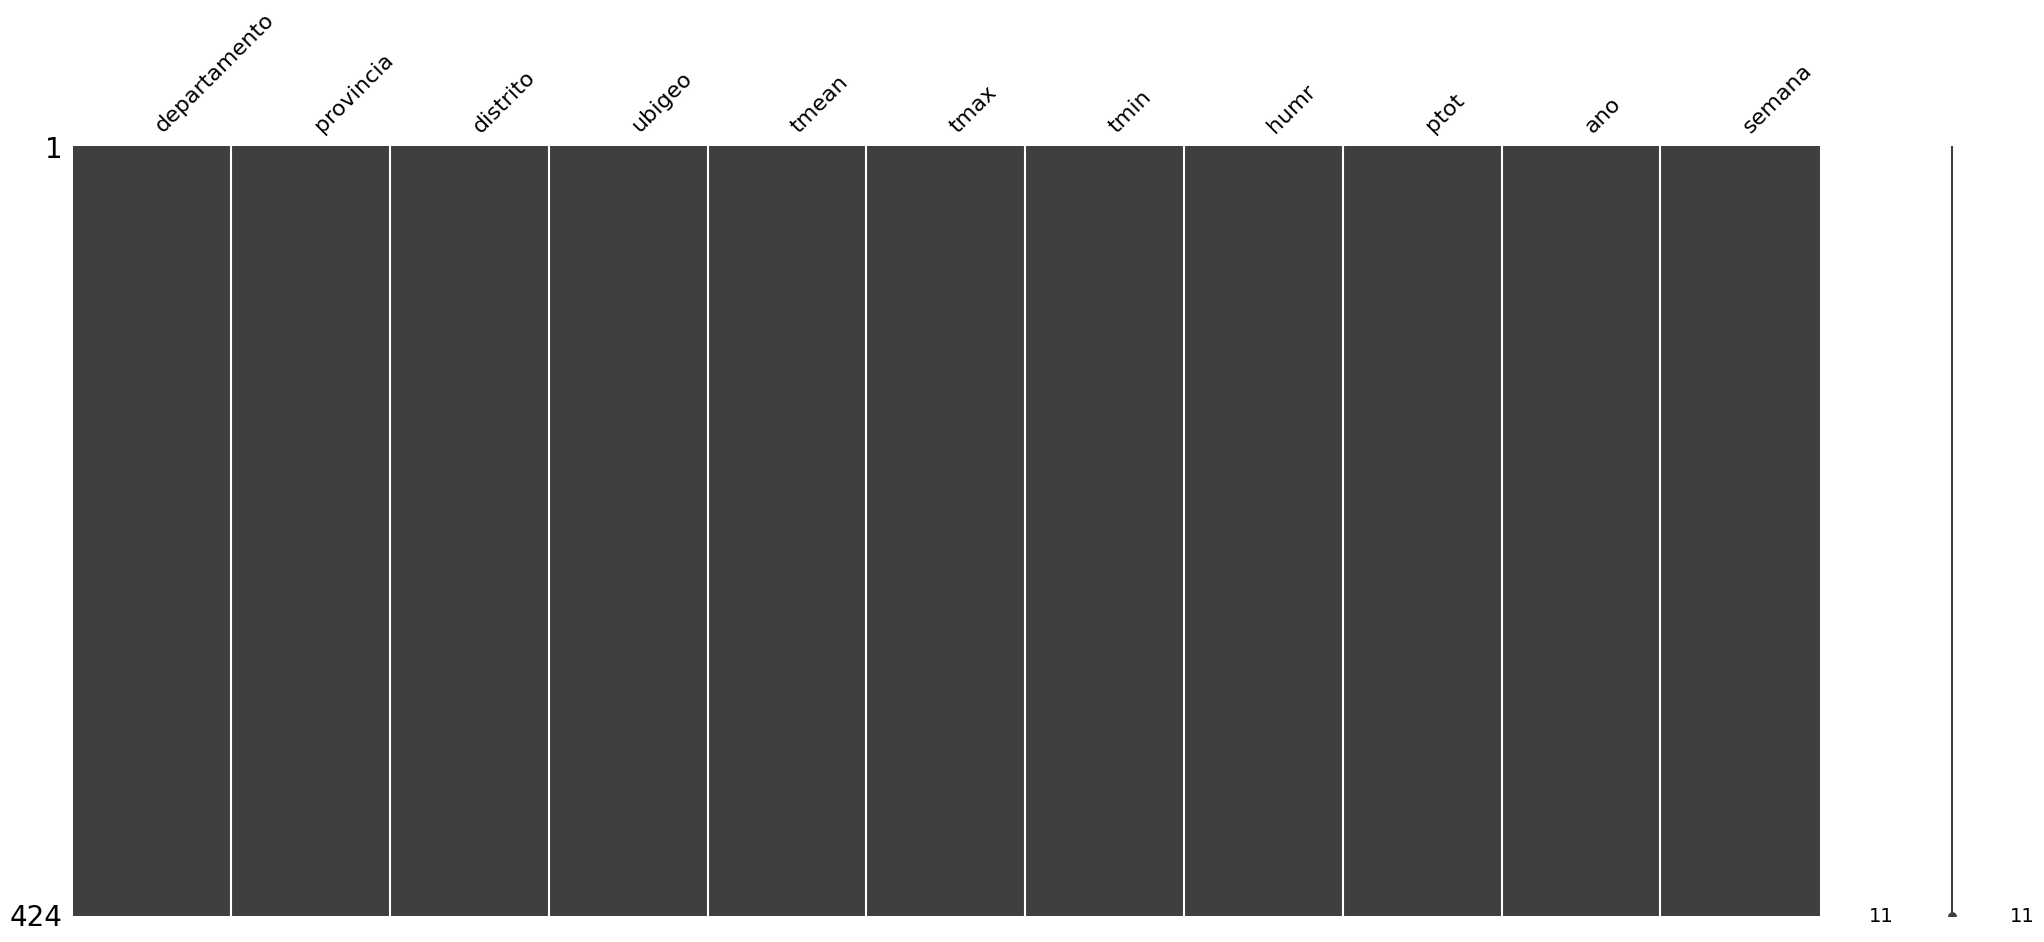

In [21]:
# Genera una matriz de visualización que muestra la distribución de los valores nulos en el DataFrame 'data_Meterologica_2016_2023'.
msno.matrix(data_Meterologica_2016_2023) 


Análisis para tmean:
- Rango normal: [16.45, 32.05]
- Número de outliers: 0

Análisis para tmax:
- Rango normal: [24.64, 37.54]
- Número de outliers: 0

Análisis para tmin:
- Rango normal: [10.93, 28.73]
- Número de outliers: 0

Análisis para humr:
- Rango normal: [59.94, 78.44]
- Número de outliers: 34
- Valores atípicos encontrados: [82.6 83.6 82.3 84.4 81.8 82.5 84.7 90.2 89.2 89.6 88.6 79.8 79.9 55.2
 55.1 58.5 59.3 58.6 54.4 79.1 57.7 59.7 59.8 59.4 80.1 82.2 80.4 87.7
 85.4 83.4]

Análisis para ptot:
- Rango normal: [-3.00, 5.00]
- Número de outliers: 66
- Valores atípicos encontrados: [  5.1  10.9   6.2  18.5  16.6  75.3  17.7   5.3  15.2  14.1  16.5   5.7
  13.6 106.7  42.7  61.8  89.8 173.9 124.4 180.7 149.2  14.9  14.8   5.6
  11.7   6.9  28.2   8.3   7.1  14.   11.6  25.4  10.4   7.5   5.2  16.3
  20.7   9.9   6.   13.1  45.4  20.1   9.7   5.4  17.5  14.2   6.6   8.1
  56.  100.9  40.5  29.1  54.9 135.5  46.7  66.9  54.1  10.8  21.6  29. ]


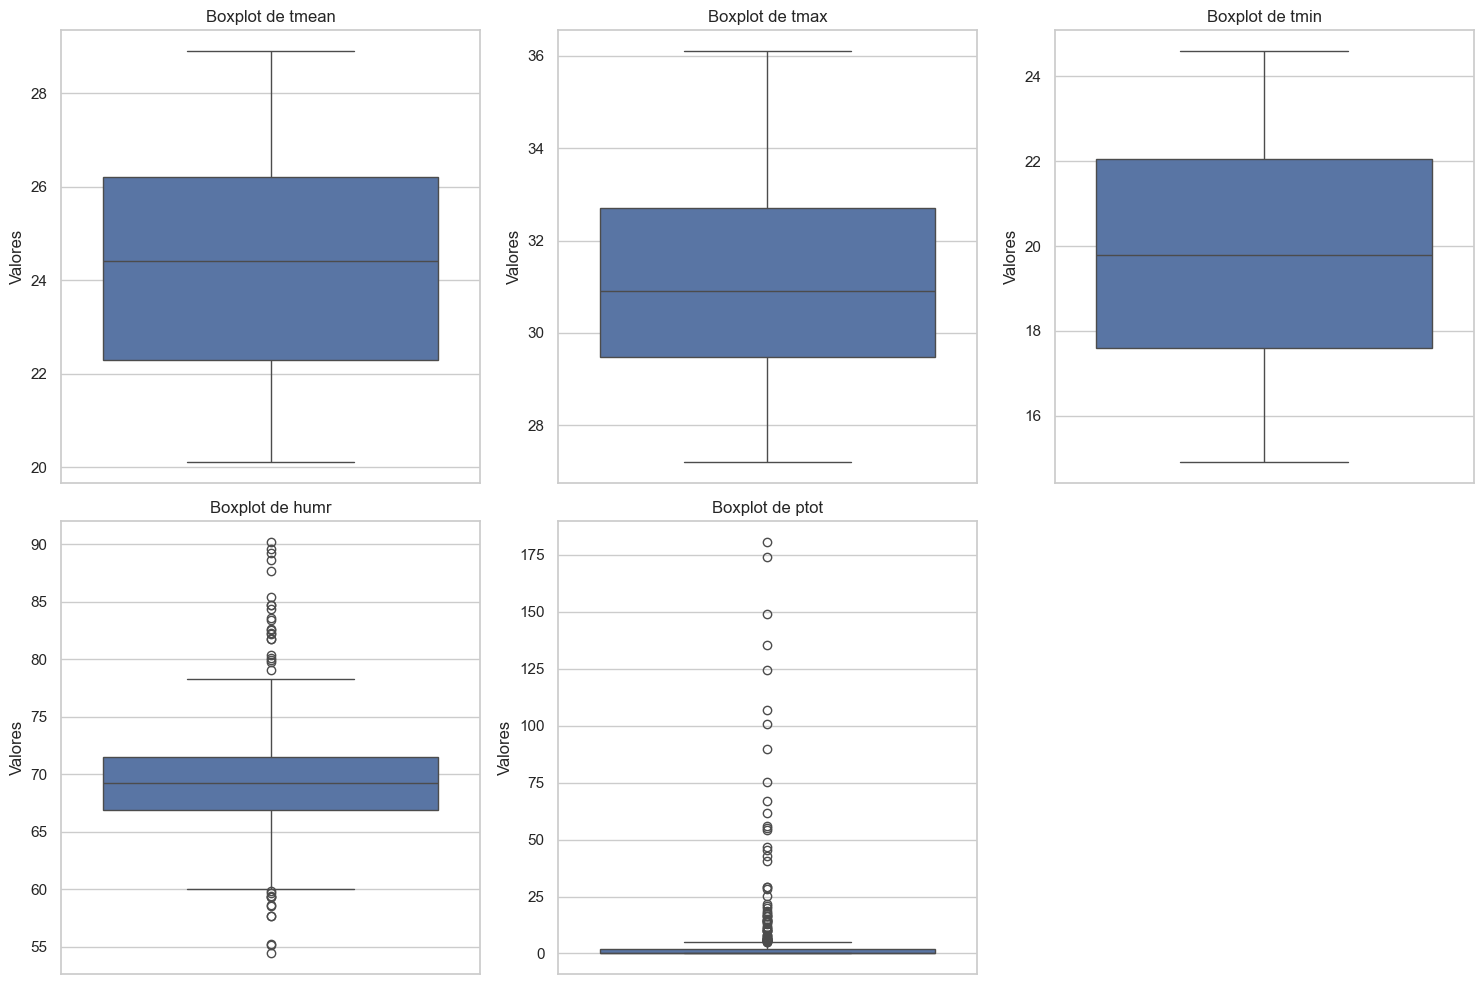

In [22]:
# Tratamiento de Outliers, para data_Meterologica_2016_2023
# Generación de diagramas Boxplot, para las columnas: "tmean", "tmax", "tmin", "humr", "ptot"

import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas numéricas de interés
columnas = ['tmean', 'tmax', 'tmin', 'humr', 'ptot']

# Configurar el estilo de los gráficos
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Crear boxplots para cada columna
for i, col in enumerate(columnas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data_Meterologica_2016_2023[col])
    plt.title(f'Boxplot de {col}')
    plt.ylabel('Valores')
    
    # Calcular estadísticas para identificar outliers
    Q1 = data_Meterologica_2016_2023[col].quantile(0.25)
    Q3 = data_Meterologica_2016_2023[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers = data_Meterologica_2016_2023[(data_Meterologica_2016_2023[col] < lower_bound) | (data_Meterologica_2016_2023[col] > upper_bound)]
    print(f'\nAnálisis para {col}:')
    print(f'- Rango normal: [{lower_bound:.2f}, {upper_bound:.2f}]')
    print(f'- Número de outliers: {len(outliers)}')
    if not outliers.empty:
        print(f'- Valores atípicos encontrados: {outliers[col].unique()}')

plt.tight_layout()
plt.show()

In [23]:
# Imputación de Valores Atípicos en la Columna "humr", para data_Meterologica_2016_2023
# Para manejar los valores atípicos en la humedad relativa (humr), primero identificaremos los valores fuera del rango [60, 80] y luego aplicaremos un método de imputación.

In [24]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Definir límites
df=data_Meterologica_2016_2023.copy()
lower_limit = 60
upper_limit = 80

# Identificar outliers
outliers_mask = (df['humr'] < lower_limit) | (df['humr'] > upper_limit)
#print(f"🔎 Valores fuera del rango [50%, 80%]: {outliers_mask.sum()} ({(outliers_mask.sum()/len(df))*100:.2f}%)")

# Seleccionar variables predictoras (temperatura, precipitación, semana del año)
features = ['tmean', 'tmax', 'tmin', 'ptot', 'semana']

# Configurar el imputador
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    max_iter=50,
    initial_strategy='median',
    imputation_order='ascending'
)

# Aplicar imputación
df['humr_imputed'] = df['humr'].copy()
df.loc[outliers_mask, 'humr_imputed'] = np.nan  # Marcamos outliers como NaN para imputar
df['humr_imputed'] = imputer.fit_transform(df[['humr_imputed'] + features])[:, 0]

# Reemplazar la columna original 
df['humr'] = df['humr_imputed']
df.drop('humr_imputed', axis=1, inplace=True)

data_Meterologica_2016_2023=df

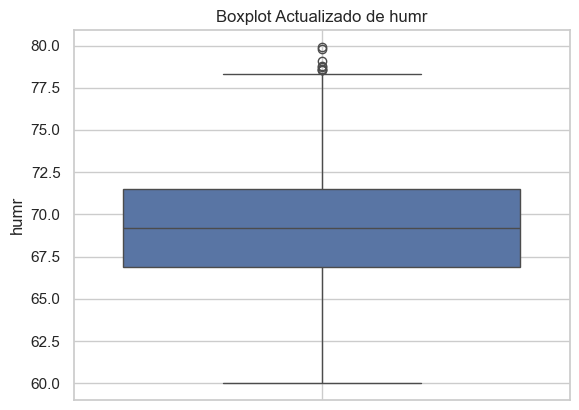

In [25]:
# Generación de boxplot Actualizado para 'humr'
import seaborn as sns

sns.boxplot(y=data_Meterologica_2016_2023['humr'])
plt.title('Boxplot Actualizado de humr')
plt.grid(True)
plt.show()


In [26]:
# Imputación de Valores Atípicos en la Columna "ptot", para data_Meterologica_2016_2023
# Para manejar los valores atípicos de la Precipitación total acumulada en la semana (ptot), primero identificaremos los valores mayores de 50 y luego aplicaremos un método de imputación.

In [27]:
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Definir límites
df=data_Meterologica_2016_2023.copy()
upper_limit = 50

# Identificar outliers
outliers_mask = (df['ptot'] > upper_limit)

# Seleccionar variables predictoras (temperatura, precipitación, semana del año)
features = ['tmean', 'tmax', 'tmin', 'humr', 'semana']

# Configurar el imputador
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    max_iter=50,
    initial_strategy='median',
    imputation_order='ascending'
)

# Aplicar imputación
df['ptot_imputed'] = df['ptot'].copy()
df.loc[outliers_mask, 'ptot_imputed'] = np.nan  # Marcamos outliers como NaN para imputar
df['ptot_imputed'] = imputer.fit_transform(df[['ptot_imputed'] + features])[:, 0]

# Reemplazar la columna original 
df['ptot'] = df['ptot_imputed']
df.drop('ptot_imputed', axis=1, inplace=True)

data_Meterologica_2016_2023=df

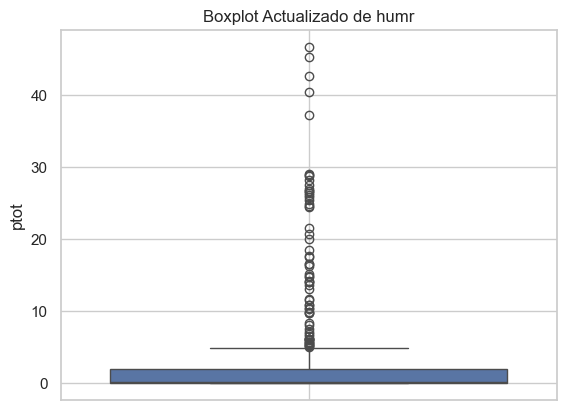

In [28]:
# Generación de boxplot Actualizado para 'ptot'

sns.boxplot(y=data_Meterologica_2016_2023['ptot'])
plt.title('Boxplot Actualizado de humr')
plt.grid(True)
plt.show()

In [29]:
# Tratamiento de Missing para data_Dengue_Piura_2016_2023
# Metodo visual para ver que columnas contienen algún missing
data_Dengue_Piura_2016_2023.isnull().any()

departamento    False
provincia       False
distrito        False
enfermedad      False
ano             False
semana          False
diagnostic      False
tipo_dx         False
diresa          False
ubigeo          False
edad            False
tipo_edad       False
sexo            False
dtype: bool

In [30]:
# Número de missing por columnas
data_Dengue_Piura_2016_2023.isnull().sum()

departamento    0
provincia       0
distrito        0
enfermedad      0
ano             0
semana          0
diagnostic      0
tipo_dx         0
diresa          0
ubigeo          0
edad            0
tipo_edad       0
sexo            0
dtype: int64

In [31]:
data_Dengue_Piura_2016_2023

,departamento,provincia,distrito,enfermedad,ano,semana,diagnostic,tipo_dx,diresa,ubigeo,edad,tipo_edad,sexo
232103,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2016,15,A97.0,C,32.0,200101,21,A,F
232112,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2016,15,A97.0,C,32.0,200101,53,A,M
232134,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2016,16,A97.0,C,32.0,200101,7,A,M
232226,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2016,16,A97.0,C,32.0,200101,48,A,F
232239,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2016,16,A97.0,C,32.0,200101,49,A,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
756839,PIURA,PIURA,PIURA,DENGUE CON SIGNOS DE ALARMA,2023,25,A97.1,C,32.0,200101,12,A,F
756841,PIURA,PIURA,PIURA,DENGUE CON SIGNOS DE ALARMA,2023,38,A97.1,C,32.0,200101,24,A,M
756842,PIURA,PIURA,PIURA,DENGUE CON SIGNOS DE ALARMA,2023,42,A97.1,C,32.0,200101,29,A,F
757727,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2023,52,A97.0,C,32.0,200101,58,A,M


In [32]:
data_Meterologica_2016_2023

,departamento,provincia,distrito,ubigeo,tmean,tmax,tmin,humr,ptot,ano,semana
0,PIURA,PIURA,PIURA,200101,27.2,34.2,22.900,68.0,0.0,2016,1
1,PIURA,PIURA,PIURA,200101,27.2,34.0,23.000,68.0,0.0,2016,2
2,PIURA,PIURA,PIURA,200101,27.7,34.6,22.806,66.7,5.1,2016,3
3,PIURA,PIURA,PIURA,200101,27.5,33.9,23.700,69.3,10.9,2016,4
4,PIURA,PIURA,PIURA,200101,27.2,32.5,23.900,73.8,6.2,2016,5
...,...,...,...,...,...,...,...,...,...,...,...
419,PIURA,PIURA,PIURA,200101,25.3,32.1,20.700,67.6,0.0,2023,49
420,PIURA,PIURA,PIURA,200101,25.8,33.1,21.100,68.0,0.7,2023,50
421,PIURA,PIURA,PIURA,200101,26.2,33.5,21.700,68.3,0.0,2023,51
422,PIURA,PIURA,PIURA,200101,25.0,30.7,21.700,77.1,29.0,2023,52


In [33]:
# Data Población para el distrito de Piura
# -----------------------------------------

# Para data_Poblacion
data_Poblacion = pd.read_excel('PoblacionPiuraDistrito.xlsx')
#print(data.head())
data_Poblacion.head(8)

,Año,Poblacion
0,2016,NaN
1,2017,158495.0
2,2018,169213.0
3,2019,173672.0
4,2020,177748.0
5,2021,181371.0
6,2022,184732.0
7,2023,187926.0


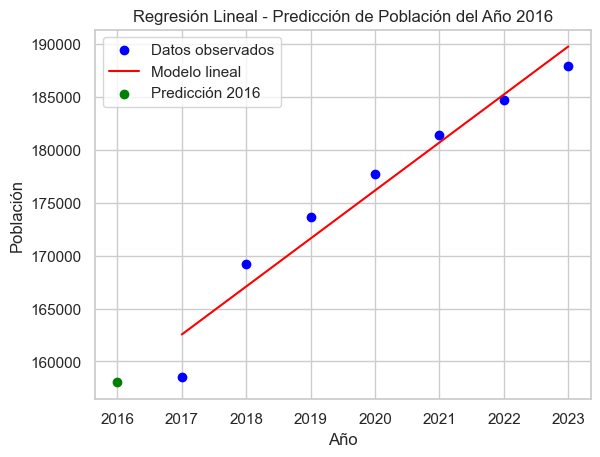

In [34]:
# Utilizamos un Modelo de Regresión Lineal, para prdecir la población del año 2016 del distrito de Piura ("Imputación del missing")

from sklearn.linear_model import LinearRegression
df = data_Poblacion[data_Poblacion['Año'] != 2016].copy()

# Preparar variables
X = df[['Año']]
y = df['Poblacion']

# Crear y entrenar modelo
model = LinearRegression()
model.fit(X, y)

# Predecir 2016
poblacion_2016 = int(model.predict(pd.DataFrame([[2016]], columns=['Año']))[0])

# Graficar la regresión
plt.scatter(X, y, color='blue', label='Datos observados')
plt.plot(X, model.predict(X), color='red', label='Modelo lineal')
plt.scatter([2016], poblacion_2016, color='green', label='Predicción 2016')
plt.xlabel("Año")
plt.ylabel("Población")
plt.title("Regresión Lineal - Predicción de Población del Año 2016")
plt.legend()
plt.grid(True)
plt.show()

# Imputación del valor predecido, para el año 2016
data_Poblacion.loc[data_Poblacion['Año'] == 2016, 'Poblacion'] = poblacion_2016

In [35]:
data_Poblacion.head(8)

,Año,Poblacion
0,2016,158018.0
1,2017,158495.0
2,2018,169213.0
3,2019,173672.0
4,2020,177748.0
5,2021,181371.0
6,2022,184732.0
7,2023,187926.0


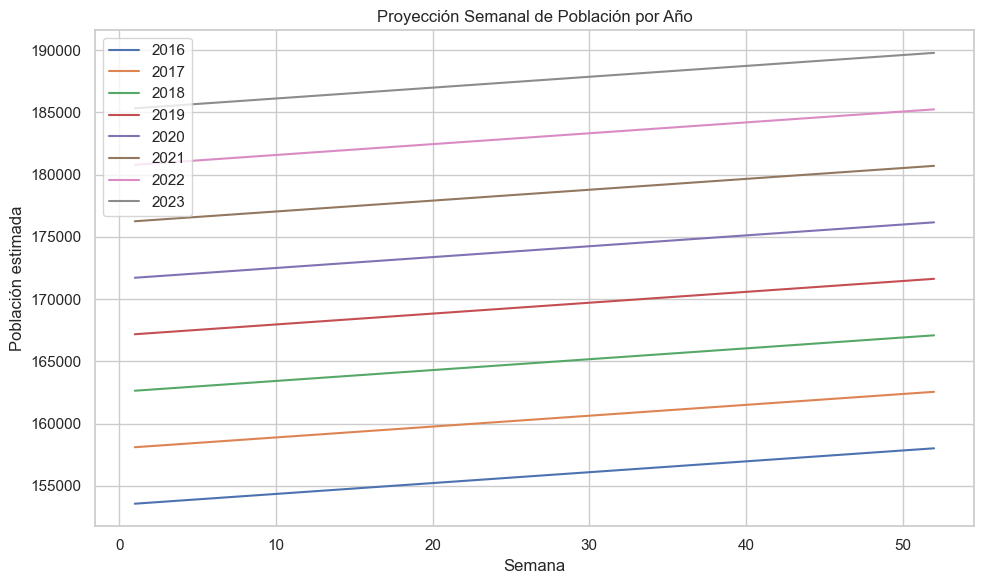

In [36]:
# Ahora de acuerdo a la Población por año del distrito de Piura del 2016 al 2023, predecimos la población por semana para cada año, a través de un modelo de regresión lineal

df = data_Poblacion

# Ajustar modelo de regresión lineal
X = df[["Año"]]
y = df["Poblacion"]

modelo = LinearRegression()
modelo.fit(X, y)

# Predecir población semana a semana para cada año
semanas = range(1, 53)
resultados = []

for i in range(len(df)):
    año = df.loc[i, "Año"]
    poblacion_ano_actual = modelo.predict(pd.DataFrame([[año]], columns=["Año"]))[0]
    poblacion_ano_anterior = modelo.predict(pd.DataFrame([[año - 1]], columns=["Año"]))[0]
    delta = (poblacion_ano_actual - poblacion_ano_anterior) / 52

    for semana in semanas:
        poblacion_semana = poblacion_ano_anterior + delta * semana
        resultados.append({"Año": año, "Semana": semana, "Poblacion": int(poblacion_semana)})

# Crear DataFrame final
df_semanal = pd.DataFrame(resultados)

# Graficar una muestra de la evolución semanal
plt.figure(figsize=(10,6))
for año in df["Año"]:
    df_temp = df_semanal[df_semanal["Año"] == año]
    plt.plot(df_temp["Semana"], df_temp["Poblacion"], label=f"{año}")
plt.xlabel("Semana")
plt.ylabel("Población estimada")
plt.title("Proyección Semanal de Población por Año")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Data de la población para el distrito de Piura por semana, de los años 2016 al 2023
df_semanal = df_semanal.rename(columns={'Año': 'ano'})
df_semanal = df_semanal.rename(columns={'Semana': 'semana'})
df_semanal = df_semanal.rename(columns={'Poblacion': 'poblacion'})
data_Poblacion_2016_2023=df_semanal

In [37]:
data_Poblacion_2016_2023.head(416)

,ano,semana,poblacion
0,2016,1,153568
1,2016,2,153655
2,2016,3,153743
3,2016,4,153830
4,2016,5,153917
...,...,...,...
411,2023,48,189426
412,2023,49,189513
413,2023,50,189601
414,2023,51,189688


In [38]:
# Unificación de Dataset(s): 'data_Dengue_Piura_2016_2023', 'data_Meterologica_2016_2023' y 'data_Poblacion_2016_2023', que servira para la aplicación de los Modelos
# La unificación se dara a traves de las columnas: 'semana' y 'ano'

# Unificación 'data_Dengue_Piura_2016_2023' y 'data_Meterologica_2016_2023'
dataUnida = pd.merge(data_Dengue_Piura_2016_2023, data_Meterologica_2016_2023, how='left', on=['semana', 'ano'])

# Unificación Resultante y 'data_Poblacion_2016_2023'
dataUnida = pd.merge(dataUnida, data_Poblacion_2016_2023, how='left', on=['semana', 'ano'])

dataUnida

,departamento_x,provincia_x,distrito_x,enfermedad,ano,semana,diagnostic,tipo_dx,diresa,ubigeo_x,...,departamento_y,provincia_y,distrito_y,ubigeo_y,tmean,tmax,tmin,humr,ptot,poblacion
0,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2016,15,A97.0,C,32.0,200101,...,PIURA,PIURA,PIURA,200101,27.3,32.9,23.6,68.600,0.100,154789
1,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2016,15,A97.0,C,32.0,200101,...,PIURA,PIURA,PIURA,200101,27.3,32.9,23.6,68.600,0.100,154789
2,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2016,16,A97.0,C,32.0,200101,...,PIURA,PIURA,PIURA,200101,26.8,33.8,22.3,66.600,14.100,154877
3,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2016,16,A97.0,C,32.0,200101,...,PIURA,PIURA,PIURA,200101,26.8,33.8,22.3,66.600,14.100,154877
4,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2016,16,A97.0,C,32.0,200101,...,PIURA,PIURA,PIURA,200101,26.8,33.8,22.3,66.600,14.100,154877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26637,PIURA,PIURA,PIURA,DENGUE CON SIGNOS DE ALARMA,2023,25,A97.1,C,32.0,200101,...,PIURA,PIURA,PIURA,200101,24.7,30.8,20.2,71.200,0.000,187420
26638,PIURA,PIURA,PIURA,DENGUE CON SIGNOS DE ALARMA,2023,38,A97.1,C,32.0,200101,...,PIURA,PIURA,PIURA,200101,24.5,31.3,19.9,69.100,0.000,188554
26639,PIURA,PIURA,PIURA,DENGUE CON SIGNOS DE ALARMA,2023,42,A97.1,C,32.0,200101,...,PIURA,PIURA,PIURA,200101,25.0,32.2,20.2,67.700,0.100,188903
26640,PIURA,PIURA,PIURA,DENGUE SIN SIGNOS DE ALARMA,2023,52,A97.0,C,32.0,200101,...,PIURA,PIURA,PIURA,200101,25.0,30.7,21.7,77.100,29.000,189775


In [39]:
# Analizamos missing
dataUnida.isnull().sum()

departamento_x    0
provincia_x       0
distrito_x        0
enfermedad        0
ano               0
semana            0
diagnostic        0
tipo_dx           0
diresa            0
ubigeo_x          0
edad              0
tipo_edad         0
sexo              0
departamento_y    0
provincia_y       0
distrito_y        0
ubigeo_y          0
tmean             0
tmax              0
tmin              0
humr              0
ptot              0
poblacion         0
dtype: int64

In [40]:
# No existe ningun missing, quiere decir que cada observación de la Data del Dengue, tiene su correspondencia en la Data Meteorologica, 
# por semana y año, para el Departamento de Piura, entre los años 2016 y 2023

# Pasamos a calcular el número de casos por semana y año
group_cols=['ano','semana','departamento_x','provincia_x','distrito_x','tmean','tmax','tmin','humr','ptot','poblacion']

# Agrupar y contar ocurrencias
data=dataUnida.groupby(group_cols).size().reset_index(name='NumCasos')
data = data.rename(columns={'departamento_x': 'departamento'})
data = data.rename(columns={'provincia_x': 'provincia'})
data = data.rename(columns={'distrito_x': 'distrito'})
data

,ano,semana,departamento,provincia,distrito,tmean,tmax,tmin,humr,ptot,poblacion,NumCasos
0,2016,2,PIURA,PIURA,PIURA,27.2,34.0,23.000,68.0,0.0,153655,1
1,2016,3,PIURA,PIURA,PIURA,27.7,34.6,22.806,66.7,5.1,153743,4
2,2016,4,PIURA,PIURA,PIURA,27.5,33.9,23.700,69.3,10.9,153830,5
3,2016,5,PIURA,PIURA,PIURA,27.2,32.5,23.900,73.8,6.2,153917,1
4,2016,6,PIURA,PIURA,PIURA,27.3,32.9,23.900,73.5,18.5,154004,2
...,...,...,...,...,...,...,...,...,...,...,...,...
276,2023,48,PIURA,PIURA,PIURA,25.0,32.0,20.200,68.2,0.2,189426,19
277,2023,49,PIURA,PIURA,PIURA,25.3,32.1,20.700,67.6,0.0,189513,12
278,2023,50,PIURA,PIURA,PIURA,25.8,33.1,21.100,68.0,0.7,189601,18
279,2023,51,PIURA,PIURA,PIURA,26.2,33.5,21.700,68.3,0.0,189688,9


# 3. ANÁLISIS DE LAS VARIABLES

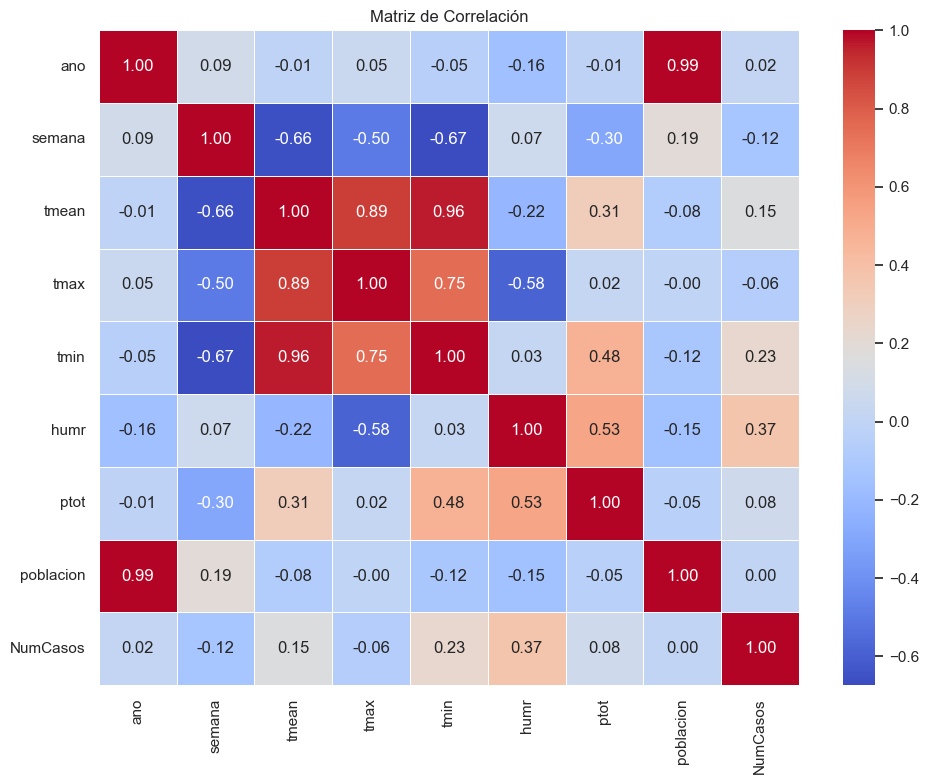

In [41]:
# Matriz de Correlación de las Variables

correlation_matrix = data.select_dtypes(include=[np.number]).corr()

# Mostrar la matriz de correlación como un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

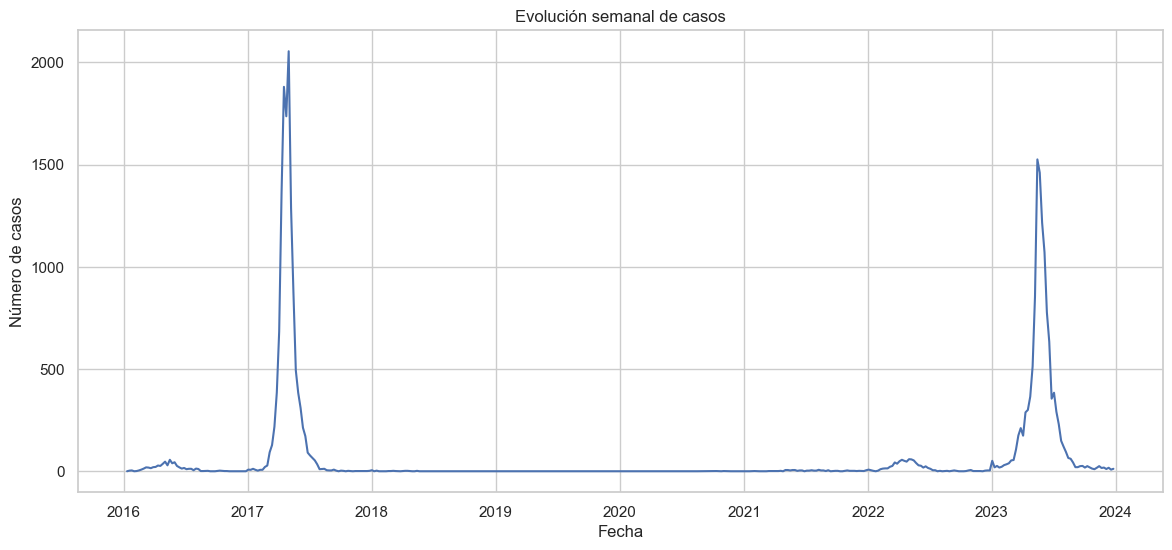

In [42]:
# Evolución semanal de casos

# Convertir año y semana a fecha aproximada
df=data
df["fecha"] = pd.to_datetime(df["ano"].astype(str) + "-" + df["semana"].astype(str) + "-1", format="%Y-%W-%w")

# Gráfico de evolución de casos
plt.figure(figsize=(14,6))
sns.lineplot(x="fecha", y="NumCasos", data=df)
plt.title("Evolución semanal de casos")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.grid(True)
plt.show()

# 4. PLANIFICACION Y APLICACIÓN DE MODELOS PREDICTIVOS

In [43]:
# Generación de Data de Entrenamiento y Data Test
# Como tenemos datos semanales ordenados por fecha, lo óptimo sería hacer una división respetando la secuencia temporal (no aleatoria).

df=data
# Asegúrate de tener una columna de fecha
df["fecha"] = pd.to_datetime(df["ano"].astype(str) + "-" + df["semana"].astype(str) + "-1", format="%Y-%W-%w")

# Ordenar por fecha por si acaso
df = df.sort_values("fecha").reset_index(drop=True)

# Usamos 80% para entrenamiento y 20% para prueba
n_total = len(df)
n_train = int(n_total * 0.8)

# Dividir
df_train = df.iloc[:n_train]
df_test = df.iloc[n_train:]

# Eliminar columna fecha
df_train = df_train.drop('fecha', axis=1)
df_test = df_test.drop('fecha', axis=1)

dataTrain=df_train
dataTest=df_test

# Comprobación del número de filas de la Data de Entrenamiento y Test
print('Número de filas de Data Train + Data Test: ',len(dataTrain)+len(dataTest))
print('Número de filas de la Data: ',len(data))

Número de filas de Data Train + Data Test:  281
Número de filas de la Data:  281


## 4.1 Modelo de Regresión Lineal


Métricas del modelo Regresion lineal:
MAE: 177.5611
RMSE: 281.4180
R² Score: 0.3909


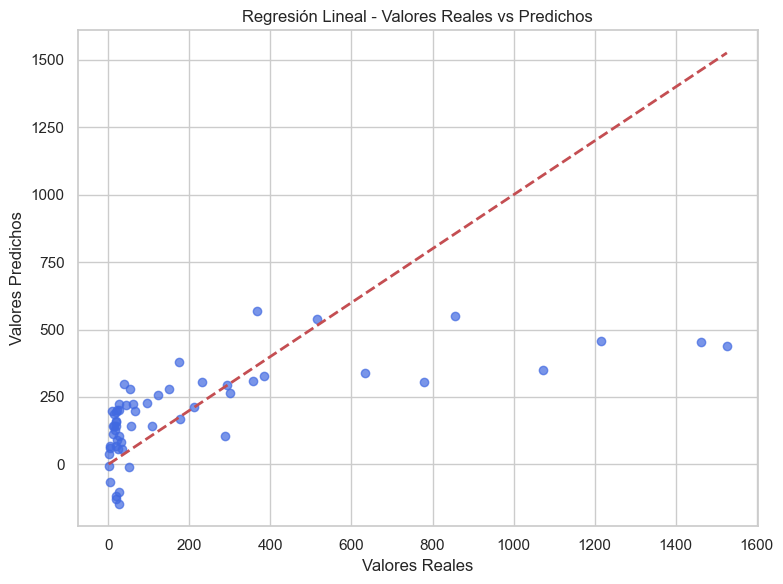

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error


# Paso 1: Cargar los datasets
train_data = dataTrain
test_data = dataTest

# Paso 2: Definir variables independientes y dependiente
features = ['ano','semana','tmean', 'tmax', 'tmin', 'humr', 'ptot', 'poblacion']
target = 'NumCasos'

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

# Paso 3: Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Paso 4: Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Paso 5: Evaluar el modelo
MAE_RegresionLineal=mean_absolute_error(y_test, y_pred)
RMSE_RegresionLineal=root_mean_squared_error(y_test, y_pred)
R2_RegresionLineal=r2_score(y_test, y_pred)

print("\nMétricas del modelo Regresion lineal:")
print(f"MAE: {MAE_RegresionLineal:.4f}")
print(f"RMSE: {RMSE_RegresionLineal:.4f}")
print(f"R² Score: {R2_RegresionLineal:.4f}")

# Paso 6: Visualizar resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal - Valores Reales vs Predichos')
plt.grid(True)
plt.tight_layout()
plt.show()


## 4.2 Modelo Random Forest Regressor


Métricas del modelo  Random Forest Regressor:
MAE: 190.2106
RMSE: 383.5758
R² Score: -0.1316


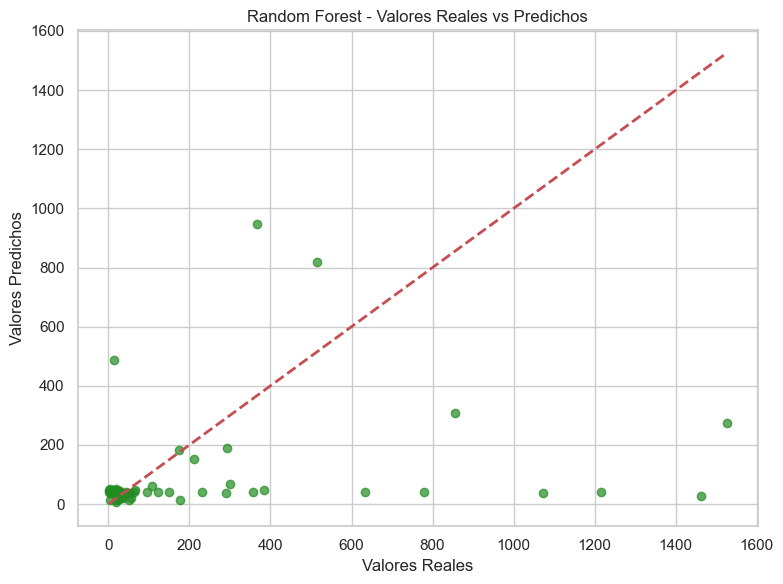

In [45]:
# Modelo Random Forest Regressor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Paso 1: Cargar los datasets
train_data = dataTrain
test_data = dataTest

# Paso 2: Definir variables independientes y dependiente
features = ['ano','tmean', 'tmin', 'humr', 'ptot']
target = 'NumCasos'

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

# Paso 3: Entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Paso 4: Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Paso 5: Evaluar el modelo
MAE_RandomForest=mean_absolute_error(y_test, y_pred)
RMSE_RandomForest=root_mean_squared_error(y_test, y_pred)
R2_RandomForest=r2_score(y_test, y_pred)

print("\nMétricas del modelo  Random Forest Regressor:")
print(f"MAE: {MAE_RandomForest:.4f}")
print(f"RMSE: {RMSE_RandomForest:.4f}")
print(f"R² Score: {R2_RandomForest:.4f}")

# Paso 6: Visualizar resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='forestgreen', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Random Forest - Valores Reales vs Predichos')
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
#pip install xgboost

## 4.3 Modelo XGBoost Regressor


Métricas del modelo:
MAE: 164.1471
RMSE: 260.0122
R² Score: 0.4800


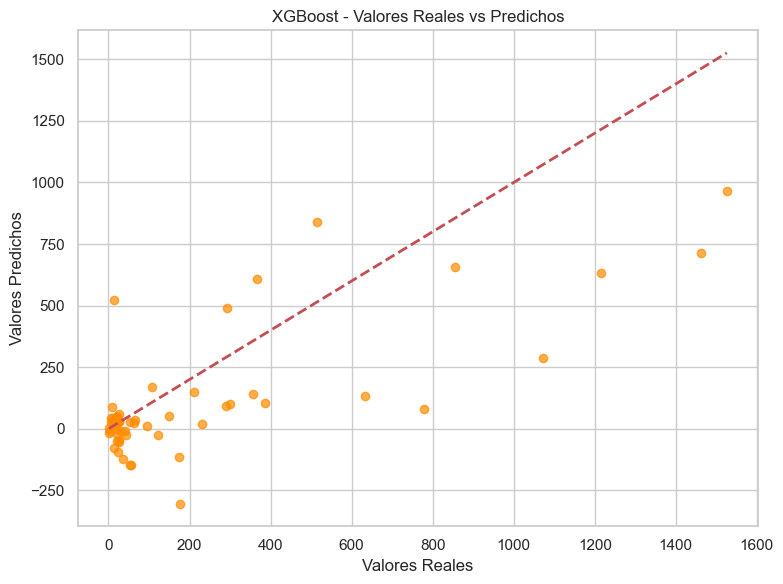

In [47]:
# Modelo XGBoost Regressor

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# Paso 1: Cargar los datasets
train = dataTrain
test = dataTest

# Paso 2: Eliminar columnas no predictivas (manteniendo semana para características temporales)
X_train = train.drop(['NumCasos', 'departamento', 'provincia', 'distrito'], axis=1)
y_train = train['NumCasos']

X_test = test.drop(['NumCasos', 'departamento', 'provincia', 'distrito'], axis=1)
y_test = test['NumCasos']

# Paso 3: Crear características temporales
def create_time_features(df):
    df['time_index'] = df['ano'] * 100 + df['semana']
    df['sin_week'] = np.sin(2 * np.pi * df['semana']/52)
    df['cos_week'] = np.cos(2 * np.pi * df['semana']/52)
    return df.drop(['ano', 'semana'], axis=1)

X_train = create_time_features(X_train)
X_test = create_time_features(X_test)

# Paso 4: Escalar características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 5: Entrenamiento del modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=10000,learning_rate=0.09,max_depth=3,subsample=0.07,colsample_bytree=1,early_stopping_rounds=50,random_state=10)
xgb_model.fit(X_train_scaled, y_train, eval_set=[(X_train_scaled, y_train)], verbose=False)

# Paso 6: Realizar predicciones
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Paso 7: Evaluar el modelo
MAE_XGBoost=mean_absolute_error(y_test, y_pred_xgb)
RMSE_XGBoost=np.sqrt(mean_squared_error(y_test, y_pred_xgb))
R2_XGBoost=r2_score(y_test, y_pred_xgb)

print("\nMétricas del modelo:")
print(f"MAE: {MAE_XGBoost:.4f}")
print(f"RMSE: {RMSE_XGBoost:.4f}")
print(f"R² Score: {R2_XGBoost:.4f}")

# Paso 8: Visualización
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='darkorange', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('XGBoost - Valores Reales vs Predichos')
plt.grid(True)
plt.tight_layout()
plt.show()


## 4.4 Modelo Support Vector Regressor (SVR) con Kernel RBF


Métricas del modelo Support Vector Regressor (SVR):
MAE: 192.1907
RMSE: 394.9349
R² Score: -0.1997


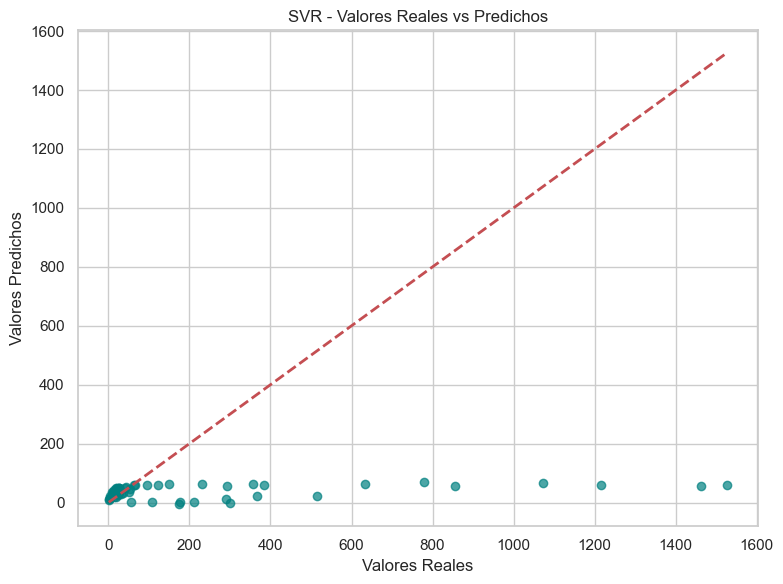

In [48]:
# Modelo Support Vector Regressor (SVR) con Kernel RBF

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Paso 1: Cargar los datasets
train_data = dataTrain
test_data = dataTest

# Paso 2: Definir variables independientes y dependiente
features = ['ano','semana','tmean', 'tmax', 'tmin', 'humr', 'ptot', 'poblacion']
target = 'NumCasos'

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

# Paso 3: Entrenar el modelo SVR con escalado
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, epsilon=0.1))
svr_model.fit(X_train, y_train)

# Paso 4: Realizar predicciones
y_pred = svr_model.predict(X_test)

# Paso 5: Evaluar el modelo
MAE_SupportVector=mean_absolute_error(y_test, y_pred)
RMSE_SupportVector=root_mean_squared_error(y_test, y_pred)
R2_SupportVector=r2_score(y_test, y_pred)

print("\nMétricas del modelo Support Vector Regressor (SVR):")
print(f"MAE: {MAE_SupportVector:.4f}")
print(f"RMSE: {RMSE_SupportVector:.4f}")
print(f"R² Score: {R2_SupportVector:.4f}")

# Paso 6: Visualización
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('SVR - Valores Reales vs Predichos')
plt.grid(True)
plt.tight_layout()
plt.show()


## 4.5 Modelo de Regresión de Poisson


Métricas del modelo:
MAE: 163.8993
RMSE: 307.1916
R² Score: 0.2742


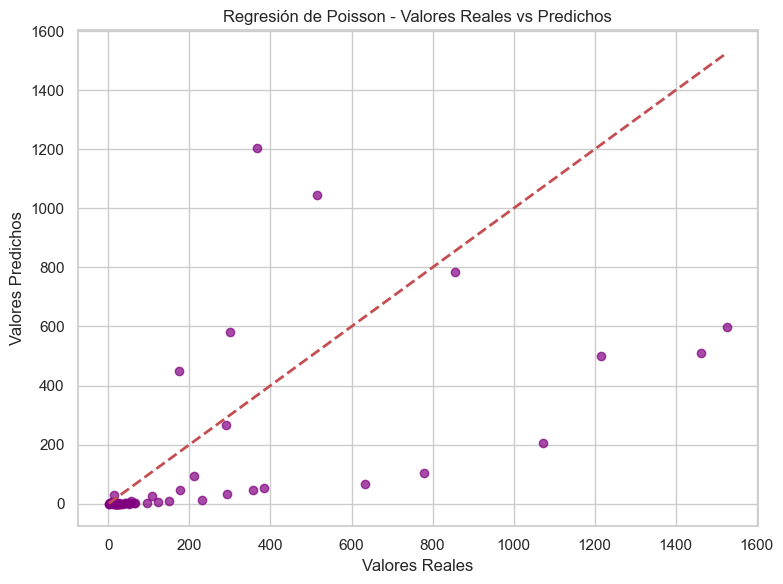

In [49]:
# Modelo de Regresión de Poisson

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.api import GLM
import statsmodels.api as sm

# Paso 1: Cargar los datasets
train = dataTrain
test = dataTest

# Paso 2: Eliminar columnas no predictivas (manteniendo semana para características temporales)
X_train = train.drop(['NumCasos', 'departamento', 'provincia', 'distrito'], axis=1)
y_train = train['NumCasos']

X_test = test.drop(['NumCasos', 'departamento', 'provincia', 'distrito'], axis=1)
y_test = test['NumCasos']

# Paso 3: Crear características temporales
def create_time_features(df):
    df['time_index'] = df['ano'] * 100 + df['semana']
    df['sin_week'] = np.sin(2 * np.pi * df['semana']/52)
    df['cos_week'] = np.cos(2 * np.pi * df['semana']/52)
    return df.drop(['ano', 'semana'], axis=1)

X_train = create_time_features(X_train)
X_test = create_time_features(X_test)

# Paso 4: Escalar características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 5: Statsmodels requiere DataFrames no escalados
poisson_model = GLM(y_train, sm.add_constant(X_train), family=sm.families.Poisson()).fit()

# Paso 6: Realizar predicciones
y_pred_pois = poisson_model.predict(sm.add_constant(X_test))

# Paso 7: Evaluar el modelo
MAE_Poisson=mean_absolute_error(y_test, y_pred_pois)
RMSE_Poisson=np.sqrt(mean_squared_error(y_test, y_pred_pois))
R2_Poisson=r2_score(y_test, y_pred_pois)

print("\nMétricas del modelo:")
print(f"MAE: {MAE_Poisson:.4f}")
print(f"RMSE: {RMSE_Poisson:.4f}")
print(f"R² Score: {R2_Poisson:.4f}")

# Paso 8: Visualización
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_pois, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión de Poisson - Valores Reales vs Predichos')
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
#pip install statsmodels

## 4.6 Modelo Regresión Binomial Negativa con statsmodels


Métricas del modelo Regresión Binomial Negativa con statsmodels:
MAE: 164.5415
RMSE: 352.3949
R² Score: 0.0449


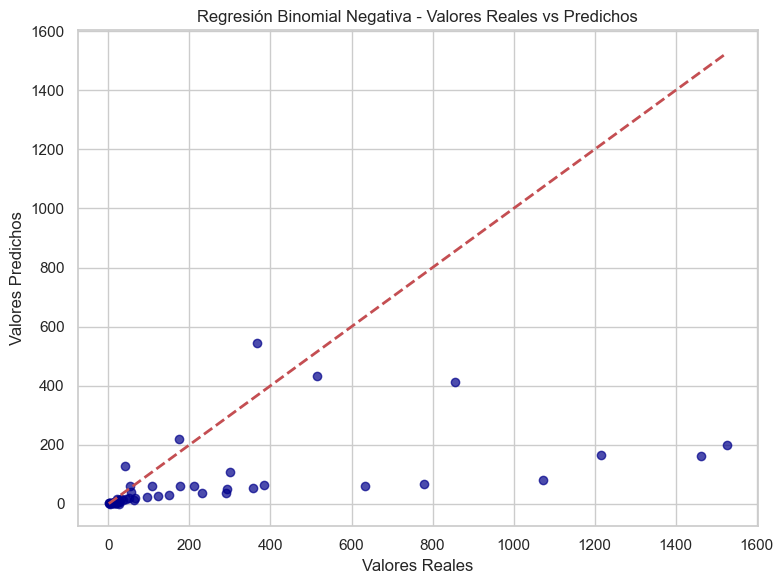

In [51]:
# Modelo Regresión Binomial Negativa con statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Paso 1: Cargar los datasets
train_data = dataTrain
test_data = dataTest

# Paso 2: Definir variables independientes y dependiente
features = ['ano','semana','tmean', 'tmax', 'tmin', 'humr', 'ptot', 'poblacion']
target = 'NumCasos'

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

# Paso 3: Escalar los datos (opcional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 4: Ajustar el modelo de regresión binomial negativa
X_train_scaled = sm.add_constant(X_train_scaled)  # Agregar la constante para el intercepto
X_test_scaled = sm.add_constant(X_test_scaled)

neg_binom_model = sm.GLM(y_train, X_train_scaled, family=sm.families.NegativeBinomial(alpha=1.0)).fit()

# Paso 5: Realizar predicciones
y_pred = neg_binom_model.predict(X_test_scaled)

# Paso 6: Evaluar el modelo
MAE_BinomialNegativa=mean_absolute_error(y_test, y_pred)
RMSE_BinomialNegativa=np.sqrt(mean_squared_error(y_test, y_pred))
R2_BinomialNegativa=r2_score(y_test, y_pred)

print("\nMétricas del modelo Regresión Binomial Negativa con statsmodels:")
print(f"MAE: {MAE_BinomialNegativa:.4f}")
print(f"RMSE: {RMSE_BinomialNegativa:.4f}")
print(f"R² Score: {R2_BinomialNegativa:.4f}")

# Paso 7: Visualización
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='darkblue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Binomial Negativa - Valores Reales vs Predichos')
plt.grid(True)
plt.tight_layout()
plt.show()


## 4.7 Modelo para Red Neuronal con MLPRegressor


Métricas del modelo Red Neuronal con MLPRegressor:
MAE: 165.6744
RMSE: 327.2357
R² Score: 0.1764


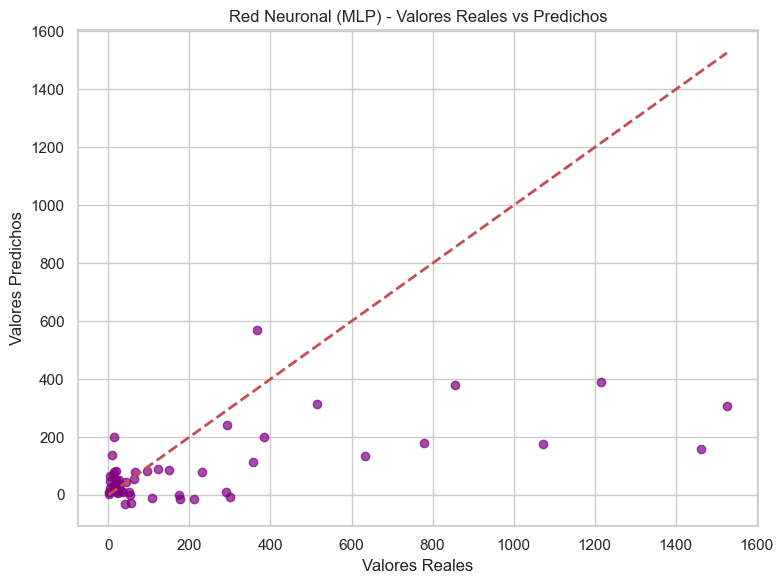

In [52]:
# Modelo para Red Neuronal con MLPRegressor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Paso 1: Cargar los datasets
train_data = dataTrain
test_data = dataTest

# Paso 2: Definir variables independientes y dependiente
features = ['ano','semana','tmean', 'tmax', 'tmin', 'humr', 'ptot', 'poblacion']
target = 'NumCasos'

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

# Paso 3: Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 4: Entrenar el modelo de Red Neuronal (MLPRegressor)
mlp_model = MLPRegressor(hidden_layer_sizes=(100,50), max_iter=2000, random_state=20, solver='adam', activation='relu', early_stopping=True, n_iter_no_change=20, validation_fraction=0.2)
mlp_model.fit(X_train_scaled, y_train)

# Paso 5: Realizar predicciones
y_pred = mlp_model.predict(X_test_scaled)

# Paso 6: Evaluar el modelo
MAE_RedNeuronal=mean_absolute_error(y_test, y_pred)
RMSE_RedNeuronal=np.sqrt(mean_squared_error(y_test, y_pred))
R2_RedNeuronal=r2_score(y_test, y_pred)

print("\nMétricas del modelo Red Neuronal con MLPRegressor:")
print(f"MAE: {MAE_RedNeuronal:.4f}")
print(f"RMSE: {RMSE_RedNeuronal:.4f}")
print(f"R² Score: {R2_RedNeuronal:.4f}")

# Paso 7: Visualización
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Red Neuronal (MLP) - Valores Reales vs Predichos')
plt.grid(True)
plt.tight_layout()
plt.show()


# 5. RESUMEN DE METRICAS Y COMPARACIÓN

In [53]:
# Crear la tabla Markdown de forma manual con alineación
markdown_table = """
● Resumen de Métricas y Comparación

-----------------------------------------------------------------
| Ítem | Modelo               |    MAE    |    RMSE   |    R²   |
|------|----------------------|-----------|-----------|---------|
|  1   | Regresión Lineal     | {:.4f}  | {:.4f}  | {:.4f}  |
|  2   | Random Forest        | {:.4f}  | {:.4f}  | {:.4f} |
|  3   | XGBoost              | {:.4f}  | {:.4f}  | {:.4f}  |
|  4   | Support Vector       | {:.4f}  | {:.4f}  | {:.4f} |
|  5   | Poisson              | {:.4f}  | {:.4f}  | {:.4f}  |
|  6   | Binomial Negativa    | {:.4f}  | {:.4f}  | {:.4f}  |
|  7   | Red Neuronal         | {:.4f}  | {:.4f}  | {:.4f}  |
-----------------------------------------------------------------
""".format(
    round(MAE_RegresionLineal, 4), round(RMSE_RegresionLineal, 4), round(R2_RegresionLineal, 4),
    round(MAE_RandomForest, 4), round(RMSE_RandomForest, 4), round(R2_RandomForest, 4),
    round(MAE_XGBoost, 4), round(RMSE_XGBoost, 4), round(R2_XGBoost, 4),
    round(MAE_SupportVector, 4), round(RMSE_SupportVector, 4), round(R2_SupportVector, 4),
    round(MAE_Poisson, 4), round(RMSE_Poisson, 4), round(R2_Poisson, 4),
    round(MAE_BinomialNegativa, 4), round(RMSE_BinomialNegativa, 4), round(R2_BinomialNegativa, 4),
    round(MAE_RedNeuronal, 4), round(RMSE_RedNeuronal, 4), round(R2_RedNeuronal, 4)
)

# Imprimir tabla Markdown
print(markdown_table)



● Resumen de Métricas y Comparación

-----------------------------------------------------------------
| Ítem | Modelo               |    MAE    |    RMSE   |    R²   |
|------|----------------------|-----------|-----------|---------|
|  1   | Regresión Lineal     | 177.5611  | 281.4180  | 0.3909  |
|  2   | Random Forest        | 190.2106  | 383.5758  | -0.1316 |
|  3   | XGBoost              | 164.1471  | 260.0122  | 0.4800  |
|  4   | Support Vector       | 192.1907  | 394.9349  | -0.1997 |
|  5   | Poisson              | 163.8993  | 307.1916  | 0.2742  |
|  6   | Binomial Negativa    | 164.5415  | 352.3949  | 0.0449  |
|  7   | Red Neuronal         | 165.6744  | 327.2357  | 0.1764  |
-----------------------------------------------------------------

